Seaborn Version: 0.10.1


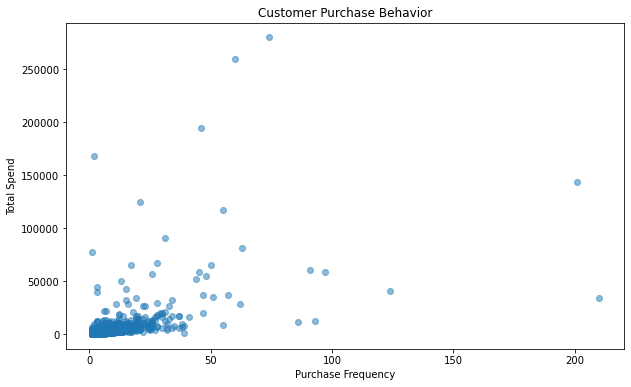

Falling back to distplot due to old Seaborn version


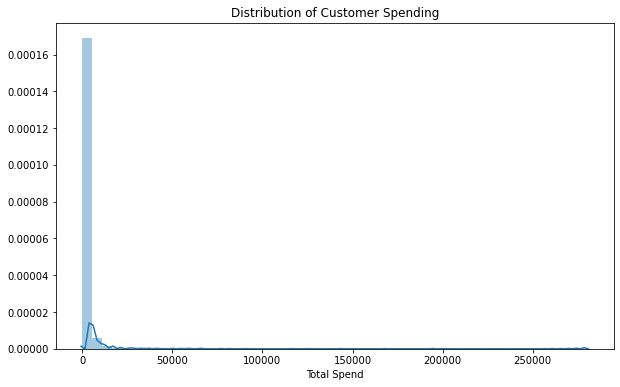


Cluster Summary:
   Cluster  Frequency     TotalSpend      AvgSpend
0        0   3.107733    1116.382416    359.655895
1        1   1.500000  122828.050000  80709.925000
2        2  89.416667  123910.465000   2260.880926
3        3  21.976526   12151.463521    707.946083


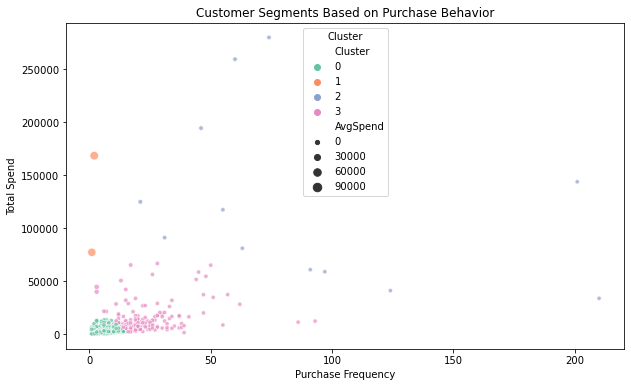


Sample Customers by Segment:
   CustomerID  Frequency  TotalSpend      AvgSpend              Segment
0     12346.0          1    77183.60  77183.600000      Frequent Buyers
1     12347.0          7     4310.00    615.714286  Occasional Shoppers
2     12348.0          4     1797.24    449.310000  Occasional Shoppers
3     12349.0          1     1757.55   1757.550000  Occasional Shoppers
4     12350.0          1      334.40    334.400000  Occasional Shoppers

Marketing Recommendations:
- Occasional Shoppers: Target with discounts
- Frequent Buyers: Target with loyalty rewards
- High Spenders: Target with premium offers
- Budget Shoppers: Target with low-cost promotions


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Check Seaborn version
print(f"Seaborn Version: {sns.__version__}")
if float(sns.__version__.split('.')[1]) < 11:
    print("Warning: Seaborn version is old. Some features may not work. Consider updating with 'pip install --upgrade seaborn'")

# Step 1: Data Wrangling
# Load dataset
try:
    df = pd.read_excel('Online_Retail.xlsx')
except FileNotFoundError:
    print("Error: 'Online_Retail.xlsx' not found. Download from https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
    exit()

# Basic cleaning
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Aggregate by customer
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Purchase frequency
    'TotalSpend': 'sum',     # Total spend
    'Quantity': 'sum'        # Total items bought
}).reset_index()
customer_df.columns = ['CustomerID', 'Frequency', 'TotalSpend', 'TotalItems']

# Feature engineering
customer_df['AvgSpend'] = customer_df['TotalSpend'] / customer_df['Frequency']

# Select features for clustering
features = ['Frequency', 'TotalSpend', 'AvgSpend']
X = customer_df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Visualization
# Scatter plot: Frequency vs. Total Spend
plt.figure(figsize=(10, 6))
plt.scatter(customer_df['Frequency'], customer_df['TotalSpend'], alpha=0.5)
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend')
plt.title('Customer Purchase Behavior')
plt.show()

# Histogram: Distribution of Total Spend
plt.figure(figsize=(10, 6))
try:
    sns.histplot(customer_df['TotalSpend'], bins=50, kde=True)  # Preferred method
except AttributeError:
    print("Falling back to distplot due to old Seaborn version")
    sns.distplot(customer_df['TotalSpend'], bins=50, kde=True)  # Fallback for old versions
plt.xlabel('Total Spend')
plt.title('Distribution of Customer Spending')
plt.show()

# Step 3: Machine Learning (K-Means Clustering)
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = customer_df.groupby('Cluster')[features].mean().reset_index()
print("\nCluster Summary:")
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='TotalSpend', hue='Cluster', size='AvgSpend', 
                data=customer_df, palette='Set2', alpha=0.7)
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend')
plt.title('Customer Segments Based on Purchase Behavior')
plt.legend(title='Cluster')
plt.show()

# Assign meaningful labels to clusters
cluster_labels = {
    0: "Occasional Shoppers",
    1: "Frequent Buyers",
    2: "High Spenders",
    3: "Budget Shoppers"
}
customer_df['Segment'] = customer_df['Cluster'].map(cluster_labels)

# Display sample customers
print("\nSample Customers by Segment:")
print(customer_df[['CustomerID', 'Frequency', 'TotalSpend', 'AvgSpend', 'Segment']].head())

# Business recommendation
print("\nMarketing Recommendations:")
for cluster, label in cluster_labels.items():
    print(f"- {label}: Target with {['discounts', 'loyalty rewards', 'premium offers', 'low-cost promotions'][cluster]}")

In [4]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\K' is not recognized as an internal or external command,
operable program or batch file.
